In [ ]:
# 📌 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [5]:
# 📥 Load Dataset
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load into DataFrame
df = pd.read_csv("UCI_Credit_Card.csv")

# Show first few rows
df.head()


Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
# 🧹 Data Cleaning

# Rename the target column
df.rename(columns={'default.payment.next.month': 'default'}, inplace=True)

# Drop the 'ID' column (not useful for prediction)
df.drop('ID', axis=1, inplace=True)

# Check for missing/null values
df.isnull().sum()


,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


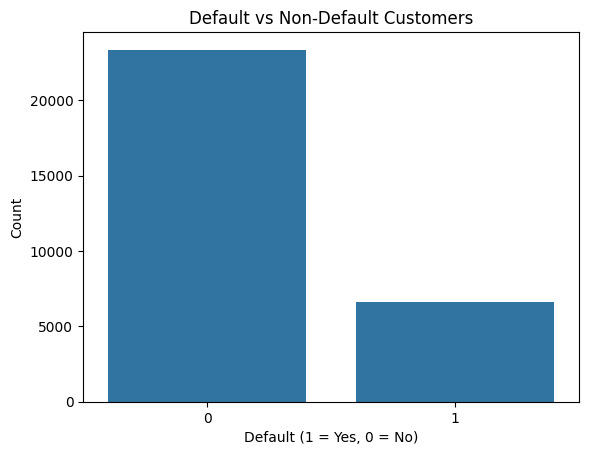

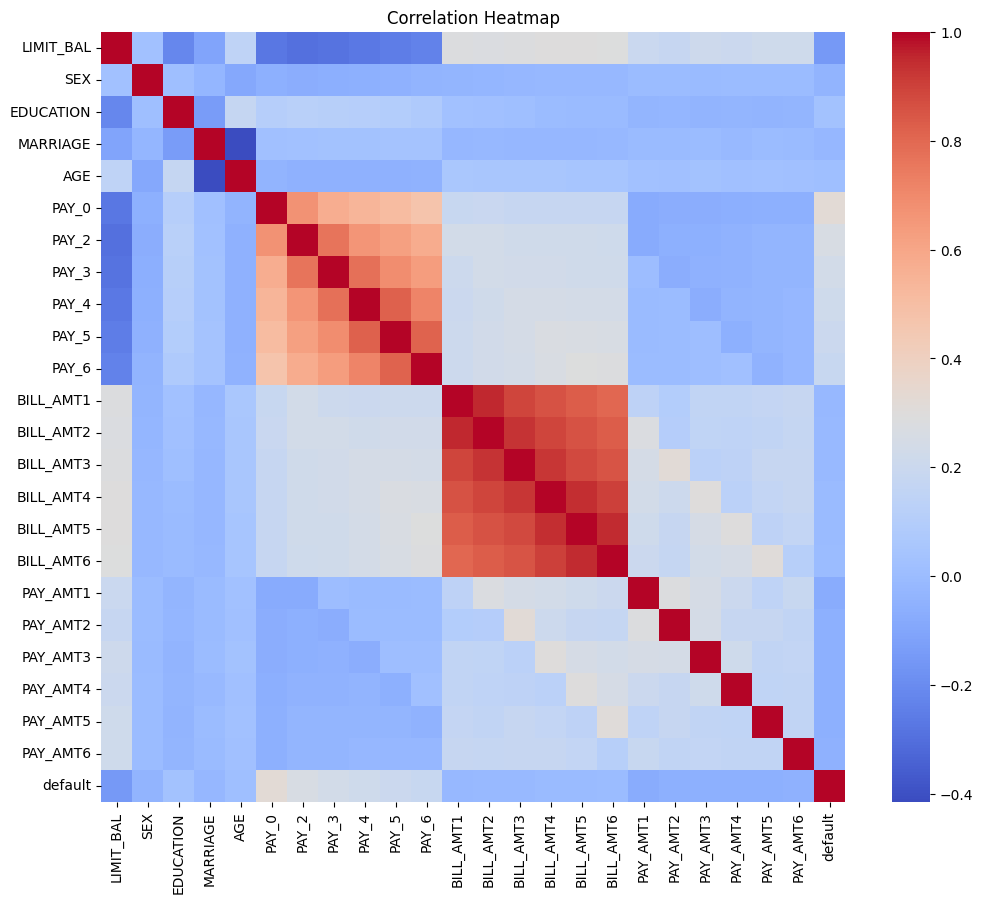

In [7]:
# 📊 Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plot default vs non-default count
sns.countplot(x='default', data=df)
plt.title('Default vs Non-Default Customers')
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# 2. Show correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [10]:
# 🤖 Train Machine Learning Model

# Split features and target
X = df.drop('default', axis=1)
y = df['default']

# Split data into training and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


In [11]:
# ✅ Model Evaluation

from sklearn.metrics import classification_report, accuracy_score

# Print accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.8131666666666667

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.36      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

